In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [7]:
AR2_Base = []
MAE_Base = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)    

In [8]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.807526,15716.597993
1,0.863895,14597.539455
2,0.793657,15289.251147
3,0.906853,14491.916096
4,0.914372,13577.563616
...,...,...
95,0.916038,13574.966223
96,0.898161,14518.101423
97,0.904075,13468.807629
98,0.858369,14649.604215


In [9]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [10]:
base_drop1.shape

(2579, 299)

In [11]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 298)

In [14]:
X2.shape[1]

298

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [16]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.908491,13707.421976
1,0.904135,15238.515083
2,0.918752,13731.985540
3,0.914385,14560.106148
4,0.919747,13559.890302
...,...,...
95,0.915920,14538.487884
96,0.906134,14265.588823
97,0.899770,14570.459070
98,0.914397,13605.626074


In [17]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [18]:
base_drop_IF.shape

(2568, 299)

In [19]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [21]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.924256,13541.557120
1,0.924957,13578.172796
2,0.909520,13895.534904
3,0.915728,14340.090968
4,0.918621,14070.860922
...,...,...
95,0.925438,12766.924467
96,0.921991,13351.374465
97,0.906890,13479.758613
98,0.908501,14402.956702


In [22]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.807526,15716.597993,0.908491,13707.421976,0.924256,13541.557120
1,0.863895,14597.539455,0.904135,15238.515083,0.924957,13578.172796
2,0.793657,15289.251147,0.918752,13731.985540,0.909520,13895.534904
3,0.906853,14491.916096,0.914385,14560.106148,0.915728,14340.090968
4,0.914372,13577.563616,0.919747,13559.890302,0.918621,14070.860922
...,...,...,...,...,...,...
95,0.916038,13574.966223,0.915920,14538.487884,0.925438,12766.924467
96,0.898161,14518.101423,0.906134,14265.588823,0.921991,13351.374465
97,0.904075,13468.807629,0.899770,14570.459070,0.906890,13479.758613
98,0.858369,14649.604215,0.914397,13605.626074,0.908501,14402.956702


In [23]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.880016,14385.278068,0.912378,14032.517853,0.915007,13709.293555
std,0.035206,685.434016,0.008741,541.915987,0.007612,523.765688
min,0.765144,12770.742708,0.878991,12632.911672,0.888737,12596.748527
25%,0.853733,13931.789862,0.907659,13668.038422,0.909063,13347.869338
50%,0.891674,14433.064032,0.913181,14043.329905,0.915708,13715.892397
75%,0.907869,14770.521489,0.918190,14382.746251,0.919883,14123.251611
max,0.924012,16247.652736,0.933401,15238.515083,0.931261,14961.114619


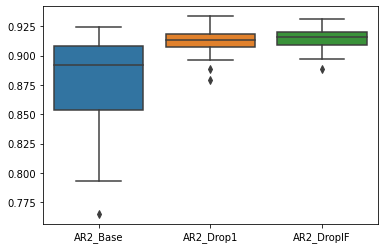

In [24]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

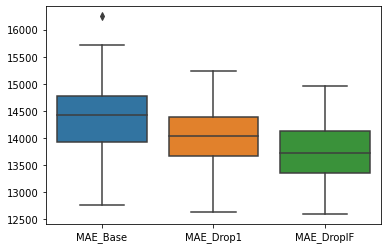

In [25]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);